<a href="https://colab.research.google.com/github/FrankDagbe/Machine_Learning_Projects/blob/main/Time_Series_Forecasting_for_Air_Passenger_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Time Series Forecasting for Air Passenger Data
##Project Description:

This Python script is part of a time series forecasting project for air passenger data. The goal is to analyze historical air passenger data, apply time series analysis techniques, and develop forecasting models to predict future passenger counts. The project includes data exploration, visualization, transformation, statistical tests, modeling with ARIMA and SARIMA, model evaluation, and future predictions.



#Code Section 1: Importing Libraries
In this section, essential libraries are imported, including Pandas for data manipulation, NumPy for numerical operations, Matplotlib for basic plotting, Seaborn for dataset loading and visualization, and warnings are suppressed for cleaner output.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [ ]:
# Explore seaborn dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#Code Section 2: Loading and Exploring Data
This section loads a sample dataset from Seaborn ('flights') and explores it by displaying the first few rows, adding a new 'month_year' column, checking data information, describing statistics, and detecting missing values.

In [ ]:
# Load a sample dataset from Seaborn
data= sns.load_dataset('flights')
data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [ ]:
# Add a new column 'month_year' to combine month and year information
data['month_year'] = '01-' +  data.month.astype(str) + '-' + data.year.astype(str)

In [ ]:
data.head()

,year,month,passengers,month_year
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   month_year  144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
data.isnull().sum()

year          0
month         0
passengers    0
month_year    0
dtype: int64

In [ ]:
# Set the 'month_year' column as the inde
data.set_index('month_year', inplace=True)
data.head()

,year,month,passengers
month_year,,,
01-Jan-1949,1949,Jan,112
01-Feb-1949,1949,Feb,118
01-Mar-1949,1949,Mar,132
01-Apr-1949,1949,Apr,129
01-May-1949,1949,May,121


#Code Section 3: Data Visualization
Visualizations are created using Seaborn and Plotly to illustrate the passenger data trends over time. A line plot is generated to visualize the number of passengers monthly.

<Axes: xlabel='month_year', ylabel='passengers'>

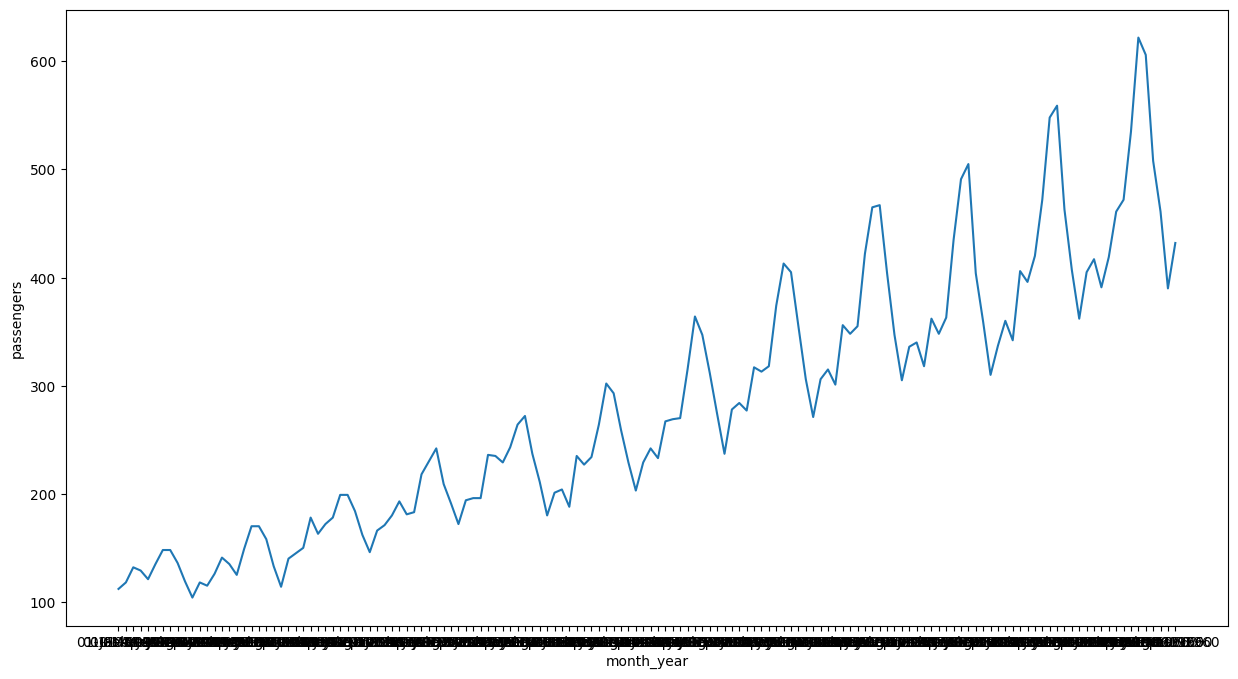

In [ ]:
# Visualize passenger data using Seaborn
plt.figure(figsize= (15,8))
sns.lineplot(data=data, x='month_year', y='passengers')

##Plotly Visualizations

In [ ]:
import plotly.express as px

# Visualize passenger data using Plotly

fig = px.line(data, x=data.index, y='passengers', title='Air Passenger Data')

fig.update_xaxes(rangeslider_visible=True)

fig.show()

#Code Section 4: Data Transformation and Preprocessing
Rolling statistics (mean and standard deviation) are calculated to identify trends and seasonality in the data.



In [ ]:
# Calculate rolling mean and standard deviation
data['rolling_mean'] = data.passengers.rolling(window=12).mean()
data['rolling_Std'] = data.passengers.rolling(window=12).std()
data.head()

,year,month,passengers,rolling_mean,rolling_Std
month_year,,,,,
01-Jan-1949,1949,Jan,112,NaN,NaN
01-Feb-1949,1949,Feb,118,NaN,NaN
01-Mar-1949,1949,Mar,132,NaN,NaN
01-Apr-1949,1949,Apr,129,NaN,NaN
01-May-1949,1949,May,121,NaN,NaN


# Code Section 5: Time Series Analysis
Time series analysis is performed using Plotly to visualize rolling statistics like mean and standard deviation. Augmented Dickey-Fuller tests are also applied to test stationarity.



In [ ]:
import plotly.graph_objects as go

# Create a Plotly figure to visualize the rolling statistics

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['passengers'], mode='lines', name='Passengers'))

fig.add_trace(go.Scatter(x=data.index, y=data['rolling_mean'], mode='lines', name='Rolling Mean'))

fig.add_trace(go.Scatter(x=data.index, y=data['rolling_Std'], mode='lines', name='Rolling Std'))

fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(title='Combined Line Plot with Range Slider')

fig.show()

##Statistical Tests

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test for stationarity
adf_test = adfuller(data.passengers, autolag='AIC')
adf_test

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

#Code Section 6: Data Transformation and Stationarity
The original 'passengers' data is differenced to make it stationary. Various transformations like log, square root, cube root, and combinations of transformations are applied to test for stationarity.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller

# Test stationarity of the original 'passengers' data

def test_stationarity(data, var):
    data['rolling_mean'] = data[var].rolling(window=12).mean()
    data['rolling_std'] = data[var].rolling(window=12).std()

    adf_test = adfuller(data[var], autolag='AIC')
    stats = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#lags used', 'Number of Observations Used'])

    print(stats)

    for key, value in adf_test[4].items():
        print('Critical Value', key, ':', value)

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data.index, y=data[var], mode='lines', name='Passengers'))
    fig.add_trace(go.Scatter(x=data.index, y=data['rolling_mean'], mode='lines', name='Rolling Mean'))
    fig.add_trace(go.Scatter(x=data.index, y=data['rolling_std'], mode='lines', name='Rolling Std'))

    fig.update_xaxes(rangeslider_visible=True)

    fig.update_layout(title='Combined Line Plot with Range Slider')

    fig.show()

test_stationarity(data, 'passengers')


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
Number of Observations Used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


In [ ]:
# Create a DataFrame 'test' for further analysis
test= data[['passengers']]
test.head()

,passengers
month_year,
01-Jan-1949,112
01-Feb-1949,118
01-Mar-1949,132
01-Apr-1949,129
01-May-1949,121


In [ ]:
# Perform differencing to make the data stationary
test['shift'] = test['passengers'].shift()
test['shiftDifference'] = test['passengers'] - test['shift']
test.head(15)

,passengers,shift,shiftDifference
month_year,,,
01-Jan-1949,112,NaN,NaN
01-Feb-1949,118,112.0,6.0
01-Mar-1949,132,118.0,14.0
01-Apr-1949,129,132.0,-3.0
01-May-1949,121,129.0,-8.0
01-Jun-1949,135,121.0,14.0
01-Jul-1949,148,135.0,13.0
01-Aug-1949,148,148.0,0.0
01-Sep-1949,136,148.0,-12.0


In [ ]:
# Test stationarity of the differenced data
test_stationarity(test.dropna(), 'shiftDifference')

Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
Number of Observations Used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


In [ ]:
# Apply log transformations to the data and test for stationarity
test['log'] = np.log(test['passengers'])
test.head()

,passengers,log
month_year,,
01-Jan-1949,112,4.718499
01-Feb-1949,118,4.770685
01-Mar-1949,132,4.882802
01-Apr-1949,129,4.859812
01-May-1949,121,4.795791


In [ ]:
test_stationarity(test.dropna(), 'log')

Test Statistic                  -1.728815
p-value                          0.416331
#lags used                      13.000000
Number of Observations Used    129.000000
dtype: float64
Critical Value 1% : -3.482087964046026
Critical Value 5% : -2.8842185101614626
Critical Value 10% : -2.578864381347275


In [ ]:
# Apply various transformations to the data and test for stationarity
test['sqrt'] = np.sqrt(test['passengers'])
test.head()

,passengers,shift,shiftDifference,log,sqrt
month_year,,,,,
01-Jan-1949,112,NaN,NaN,4.718499,10.583005
01-Feb-1949,118,112.0,6.0,4.770685,10.862780
01-Mar-1949,132,118.0,14.0,4.882802,11.489125
01-Apr-1949,129,132.0,-3.0,4.859812,11.357817
01-May-1949,121,129.0,-8.0,4.795791,11.000000


In [ ]:
test_stationarity(test.dropna(), 'sqrt')

Test Statistic                  -0.375660
p-value                          0.914084
#lags used                      13.000000
Number of Observations Used    129.000000
dtype: float64
Critical Value 1% : -3.482087964046026
Critical Value 5% : -2.8842185101614626
Critical Value 10% : -2.578864381347275


In [ ]:
# Apply various transformations to the data and test for stationarity
test['cbrt'] = np.cbrt(test['passengers'])
test.head()

,passengers,shift,shiftDifference,log,sqrt,cbrt
month_year,,,,,,
01-Jan-1949,112,NaN,NaN,4.718499,10.583005,4.820285
01-Feb-1949,118,112.0,6.0,4.770685,10.862780,4.904868
01-Mar-1949,132,118.0,14.0,4.882802,11.489125,5.091643
01-Apr-1949,129,132.0,-3.0,4.859812,11.357817,5.052774
01-May-1949,121,129.0,-8.0,4.795791,11.000000,4.946087


In [ ]:
test_stationarity(test.dropna(), 'cbrt')

Test Statistic                  -0.838317
p-value                          0.807607
#lags used                      13.000000
Number of Observations Used    129.000000
dtype: float64
Critical Value 1% : -3.482087964046026
Critical Value 5% : -2.8842185101614626
Critical Value 10% : -2.578864381347275


In [ ]:
# Apply various transformations to the data and test for stationarity
test['log&sqrt'] = np.sqrt(test['log'])
test.head()

,passengers,shift,shiftDifference,log,sqrt,cbrt,log&sqrt
month_year,,,,,,,
01-Jan-1949,112,NaN,NaN,4.718499,10.583005,4.820285,2.172211
01-Feb-1949,118,112.0,6.0,4.770685,10.862780,4.904868,2.184190
01-Mar-1949,132,118.0,14.0,4.882802,11.489125,5.091643,2.209706
01-Apr-1949,129,132.0,-3.0,4.859812,11.357817,5.052774,2.204498
01-May-1949,121,129.0,-8.0,4.795791,11.000000,4.946087,2.189929


In [ ]:
test_stationarity(test.dropna(), 'log&sqrt')

Test Statistic                  -1.946386
p-value                          0.310564
#lags used                      13.000000
Number of Observations Used    129.000000
dtype: float64
Critical Value 1% : -3.482087964046026
Critical Value 5% : -2.8842185101614626
Critical Value 10% : -2.578864381347275


In [ ]:
# Apply various transformations to the data and test for stationarity
test['log_shiftDifference'] = test['log'] - test['log'].shift()
test.head()

,passengers,shift,shiftDifference,log,sqrt,cbrt,log&sqrt,log_shiftDifference
month_year,,,,,,,,
01-Jan-1949,112,NaN,NaN,4.718499,10.583005,4.820285,2.172211,NaN
01-Feb-1949,118,112.0,6.0,4.770685,10.862780,4.904868,2.184190,0.052186
01-Mar-1949,132,118.0,14.0,4.882802,11.489125,5.091643,2.209706,0.112117
01-Apr-1949,129,132.0,-3.0,4.859812,11.357817,5.052774,2.204498,-0.022990
01-May-1949,121,129.0,-8.0,4.795791,11.000000,4.946087,2.189929,-0.064022


In [ ]:
test_stationarity(test.dropna(), 'log_shiftDifference')

Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
Number of Observations Used    128.000000
dtype: float64
Critical Value 1% : -3.4825006939887997
Critical Value 5% : -2.884397984161377
Critical Value 10% : -2.578960197753906


#Code Section 7: Time Series Forecasting with ARIMA
The script performs AutoRegressive Integrated Moving Average (ARIMA) modeling to make future passenger count predictions. Parameters are selected based on the lowest AIC value. Predictions are made and added to the test data.

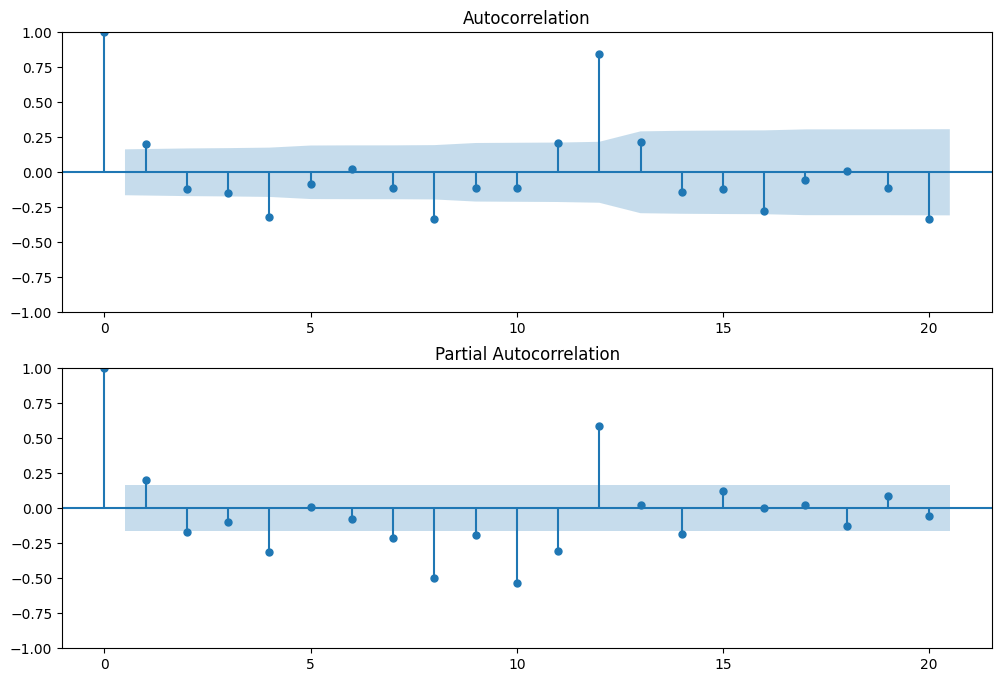

In [ ]:
import statsmodels.api as sm
# Plot ACF and PACF to determine p and q
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(test['log_shiftDifference'].dropna(), lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(test['log_shiftDifference'].dropna(), lags=20, ax=ax2)
plt.show()

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = test.log_shiftDifference[:train_size]
test_data = test.log_shiftDifference[train_size:]

In [ ]:
import itertools

# Define a range of values for p, q, and d
p_range = range(0, 3)
q_range = range(0, 3)
d_range = range(0, 2)


pdq_combinations = list(itertools.product(p_range, d_range, q_range))

best_aic = float("inf")
best_pdq = None

# Iterate over each combination and fit ARIMA models using the training data
for pdq in pdq_combinations:
    p, d, q = pdq
    try:
        # Create and fit the ARIMA model using the training data
        model = sm.tsa.ARIMA(train_data.dropna(), order=(p, d, q))
        results = model.fit()

        # Calculate AIC (Akaike Information Criterion)
        aic = results.aic

        # Check if the current model has a lower AIC than the best model so far
        if aic < best_aic:
            best_aic = aic
            best_pdq = pdq

    except:
        continue

# Print the best (p, d, q) values and corresponding AIC
print("Best (p, d, q) values:", best_pdq)
print("Best AIC:", best_aic)
print(results.summary())

Best (p, d, q) values: (2, 0, 1)
Best AIC: -217.4989183875574
                                SARIMAX Results                                
Dep. Variable:     log_shiftDifference   No. Observations:                  114
Model:                  ARIMA(2, 1, 2)   Log Likelihood                  98.742
Date:                 Fri, 08 Sep 2023   AIC                           -187.483
Time:                         13:53:52   BIC                           -173.846
Sample:                     02-01-1949   HQIC                          -181.950
                          - 07-01-1958                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5740      0.199     -2.884      0.004      -0.964      -0.184
ar.L2         -0.0100      0.131     -0.076      0.939      -

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(2, 0, 1))
model_fit = model.fit()

# Make predictions
prediction = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Add the predictions to your test dataframe
test['ARIMAPred'] = prediction
test.tail()

,passengers,shift,shiftDifference,log,sqrt,cbrt,log&sqrt,log_shiftDifference,ARIMAPred
month_year,,,,,,,,,
01-Aug-1960,606,622.0,-16.0,6.406880,24.617067,8.462348,2.531182,-0.026060,0.010941
01-Sep-1960,508,606.0,-98.0,6.230481,22.538855,7.979112,2.496093,-0.176399,0.010941
01-Oct-1960,461,508.0,-47.0,6.133398,21.470911,7.725032,2.476570,-0.097083,0.010940
01-Nov-1960,390,461.0,-71.0,5.966147,19.748418,7.306144,2.442570,-0.167251,0.010940
01-Dec-1960,432,390.0,42.0,6.068426,20.784610,7.559526,2.463417,0.102279,0.010940


#Code Section 8: SARIMA Modeling
Seasonal ARIMA (SARIMA) modeling is performed to make more advanced future passenger count predictions, considering seasonal patterns. Parameters are selected based on the lowest AIC value. Predictions are made and added to the test data.

In [ ]:
# Define a range of values for p, q, d, P, Q, D, and S
p_range = range(0, 3)
q_range = range(0, 3)
d_range = range(0, 2)
P_range = range(0, 3)
Q_range = range(0, 3)
D_range = range(0, 2)
S_values = [12]  # A yearly seasonality

pdqs_combinations = list(itertools.product(p_range, d_range, q_range, P_range, D_range, Q_range, S_values))

best_aic = float("inf")
best_pdqs = None

# Iterate over each combination and fit SARIMA models using the training data
for pdqs in pdqs_combinations:
    p, d, q, P, D, Q, S = pdqs

    try:
        model = sm.tsa.SARIMAX(train_data.dropna(), order=(p, d, q), seasonal_order=(P, D, Q, S))
        results = model.fit()

        aic = results.aic

        # Check if the current model has a lower AIC than the best model so far
        if aic < best_aic:
            best_aic = aic
            best_pdqs = pdqs

    except:
        continue

# Print the best (p, d, q, P, D, Q, S) values and corresponding AIC
print("Best (p, d, q, P, D, Q, S) values:", best_pdqs)
print("Best AIC:", best_aic)
print(results.summary())


Best (p, d, q, P, D, Q, S) values: (2, 0, 1, 1, 0, 1, 12)
Best AIC: -389.29821564707674
                                     SARIMAX Results                                      
Dep. Variable:                log_shiftDifference   No. Observations:                  114
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                 183.369
Date:                            Fri, 08 Sep 2023   AIC                           -348.739
Time:                                    14:03:19   BIC                           -325.203
Sample:                                02-01-1949   HQIC                          -339.211
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0583     

In [ ]:
# Fit a SARIMA model to the training data with the best parameters
sarimax_model = sm.tsa.SARIMAX(
    train_data.dropna(),
    order=(2, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    exog=None
)
sarimax_model_fit = sarimax_model.fit()
sarimax_prediction = sarimax_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])


# Add SARIMA predictions to the 'test' DataFrame
test['SARIMAXPred'] = sarimax_prediction

# Calculate the cumulative sum of the predicted differences and convert back to original scale
test['predicted_log'] = test['log'].shift() + test['SARIMAXPred'].cumsum()

test['predicted_passengers'] = np.exp(test['predicted_log'])




# Define a function to forecast SARIMA values
def forecast_sarimax(test, sarimax_model_fit):
    # Make predictions using SARIMA-X model
    sarimax_prediction = sarimax_model_fit.predict(start=test.index[0], end=test.index[-1])

    # Add SARIMA predictions to the test DataFrame
    test['SARIMAXPred'] = sarimax_prediction

    # Calculate the cumulative sum of the predicted differences
    test['predicted_log'] = test['log'].shift() + test['SARIMAXPred'].cumsum()

    # Convert the predicted log values back to the original scale using exponentiation
    test['predicted_passengers'] = np.exp(test['predicted_log'])

    return test

test.tail()

,passengers,shift,shiftDifference,log,sqrt,cbrt,log&sqrt,log_shiftDifference,ARIMAPred,SARIMAXPred,predicted_log,predicted_passengers
month_year,,,,,,,,,,,,
01-Aug-1960,606,622.0,-16.0,6.406880,24.617067,8.462348,2.531182,-0.026060,0.010941,-0.008104,6.650489,773.162671
01-Sep-1960,508,606.0,-98.0,6.230481,22.538855,7.979112,2.496093,-0.176399,0.010941,-0.124358,6.500072,665.189305
01-Oct-1960,461,508.0,-47.0,6.133398,21.470911,7.725032,2.476570,-0.097083,0.010940,-0.134535,6.189138,487.425881
01-Nov-1960,390,461.0,-71.0,5.966147,19.748418,7.306144,2.442570,-0.167251,0.010940,-0.122869,5.969186,391.187120
01-Dec-1960,432,390.0,42.0,6.068426,20.784610,7.559526,2.463417,0.102279,0.010940,0.113082,5.915017,370.560463


#Code Section 9: Model Evaluation
Model evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), are calculated to assess the accuracy of the SARIMA model's predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics (MAE, MSE, RMSE)

actual_values = test['passengers']
predicted_values = test['predicted_passengers'].fillna(test['predicted_passengers'].mean())

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 157.71154575962095
Mean Squared Error (MSE): 33194.496831971126
Root Mean Squared Error (RMSE): 182.19356967788715


#Code Section 10: Visualization of Results
The script visualizes actual data vs. SARIMA predictions using Plotly to provide an intuitive representation of model performance.



In [ ]:
# Visualize actual data vs. SARIMA predictions using Plotly

visualization_data = test[['log_shiftDifference', 'SARIMAXPred']]

fig = px.line(
    visualization_data,
    x=visualization_data.index,
    y=['log_shiftDifference', 'SARIMAXPred'],
    labels={'log_shiftDifference': 'Actual Data', 'SARIMAXPred': 'SARIMAX Predictions'},
    title='Actual Data vs. SARIMAX Predictions'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Data',
    showlegend=True,
    xaxis_rangeslider_visible=True
)

# Show the plot
fig.show()


In [ ]:
test.tail(10)

,passengers,shift,shiftDifference,log,sqrt,cbrt,log&sqrt,log_shiftDifference,ARIMAPred,SARIMAXPred,predicted_log,predicted_passengers
month_year,,,,,,,,,,,,
01-Mar-1960,419,391.0,28.0,6.037871,20.469489,7.482924,2.457208,0.069163,0.010929,0.141382,5.925468,374.453520
01-Apr-1960,461,419.0,42.0,6.133398,21.470911,7.725032,2.476570,0.095527,0.010931,-0.025924,5.968708,390.999988
01-May-1960,472,461.0,11.0,6.156979,21.725561,7.785993,2.481326,0.023581,0.010936,0.025182,6.089416,441.163768
01-Jun-1960,535,472.0,63.0,6.282267,23.130067,8.118041,2.506445,0.125288,0.010940,0.160664,6.273662,530.415993
01-Jul-1960,622,535.0,87.0,6.432940,24.939928,8.536178,2.536324,0.150673,0.010941,0.108970,6.507920,670.430231
01-Aug-1960,606,622.0,-16.0,6.406880,24.617067,8.462348,2.531182,-0.026060,0.010941,-0.008104,6.650489,773.162671
01-Sep-1960,508,606.0,-98.0,6.230481,22.538855,7.979112,2.496093,-0.176399,0.010941,-0.124358,6.500072,665.189305
01-Oct-1960,461,508.0,-47.0,6.133398,21.470911,7.725032,2.476570,-0.097083,0.010940,-0.134535,6.189138,487.425881
01-Nov-1960,390,461.0,-71.0,5.966147,19.748418,7.306144,2.442570,-0.167251,0.010940,-0.122869,5.969186,391.187120


In [ ]:
np.array(test['log'])


array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [ ]:
np.array(test['passengers'])

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [ ]:
from scipy.stats import linregress

# Define the logarithmic and passenger data for regression

log_value = np.array([4.71849887, 4.77068462, 4.88280192, 4.8598124, 4.79579055,
              4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
              4.6443909, 4.77068462, 4.74493213, 4.83628191, 4.94875989,
              4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
              5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
              5.01063529, 5.18178355, 5.0937502, 5.14749448, 5.18178355,
              5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
              5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
              5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425])

passenger = np.array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
              104, 118, 115, 126, 141, 135, 125, 149, 170, 170,
              158, 133, 114, 140, 145, 150, 178, 163, 172, 178,
              199, 199, 184, 162, 146, 166, 171, 180, 193, 181,
              183, 218, 230, 242, 209 ])

# Perform the logarithmic regression
slope, intercept, _, _, _ = linregress(np.log(log_value), np.log(passenger))

# The equation parameters
a = slope
b = intercept

print(f"The equation is: log(passenger) = {a:} * log(log_value) + {b:}")


The equation is: log(passenger) = 5.044015615139115 * log(log_value) + -3.1140061861454607


In [ ]:
# Define a function to calculate passenger counts using the regression equation

def calculate_passenger_counts(log_values, a=5.044015615139115, b=-3.1140061861454607):
    """
    Calculate passenger counts for given log values using the provided formula.

    Args:
        log_values (numpy.ndarray): An array of log values for which to calculate passenger counts.
        a (float): Coefficient 'a' for the formula. Default is 5.044015615139115.
        b (float): Coefficient 'b' for the formula. Default is -3.1140061861454607.

    Returns:
        list: A list of tuples containing (log_value, passenger_count) pairs.
    """
    results = []

    for log_value in log_values:
        passenger = np.exp(a * np.log(log_value) + b)
        results.append(np.round((passenger)))

    return results

In [ ]:
# Calculate passenger counts for log values
calculate_passenger_counts(log_value)

[111.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 149.0,
 149.0,
 136.0,
 119.0,
 103.0,
 118.0,
 114.0,
 126.0,
 141.0,
 135.0,
 125.0,
 150.0,
 171.0,
 171.0,
 159.0,
 133.0,
 113.0,
 140.0,
 146.0,
 151.0,
 178.0,
 164.0,
 173.0,
 178.0,
 199.0,
 199.0,
 184.0,
 163.0,
 147.0,
 167.0,
 172.0,
 180.0,
 193.0,
 181.0,
 183.0,
 217.0,
 228.0,
 239.0,
 208.0]

In [ ]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
futureDate.head()


""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


#Code Section 11: Regression for Logarithmic Transformation
Regression analysis is performed to understand the relationship between log-transformed data values. This helps in approximating a formula to convert log values back to passenger counts.

In [ ]:
# Create a DataFrame for future date predictions
future_pred= model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1])
futureDate['log_shiftDifference'] = future_pred

futureDate.head()


,log_shiftDifference
Dates,
1961-01-01,0.01094
1961-02-01,0.01094
1961-03-01,0.01094
1961-04-01,0.01094
1961-05-01,0.01094


In [ ]:
# Reconstruct log values for future predictions

def reconstruct_log_values(futureDate, test):
    # Assuming you have the values for 'SARIMAXPred' in a list or Series
    sarimax_prediction = futureDate['log_shiftDifference']

    # Initialize an empty array to hold the 'log' values
    log_values = []

    # Assuming you know the initial 'log' value (replace with the actual initial value)
    initial_log_value = test['log'][-1]

    # Iterate through 'SARIMAXPred' values to reconstruct 'log' values
    for sarimax_pred in sarimax_prediction:
        initial_log_value += sarimax_pred
        log_values.append(initial_log_value)

    # Create a new DataFrame with the 'log' values
    passenger_preds = pd.DataFrame({'log': log_values})

    return passenger_preds



In [ ]:
# Reconstruct log values and convert to passenger counts
future_log=reconstruct_log_values(futureDate, test)

#Code Section 12: Future Predictions
Future date predictions are made using the trained SARIMA model for a specified date range. Log values are reconstructed, and passenger counts are calculated for future dates.



In [ ]:
futureDate['Passengers']= calculate_passenger_counts(np.array(future_log))
futureDate.head()

,log_shiftDifference,Passengers
Dates,,
1961-01-01,0.01094,[399.0]
1961-02-01,0.01094,[403.0]
1961-03-01,0.01094,[407.0]
1961-04-01,0.01094,[410.0]
1961-05-01,0.01094,[414.0]
